In [ ]:
!pip install datasets
!pip install accelerate -U
!pip install transformers[torch]
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 34.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 6.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-no

In [ ]:
from datasets import load_dataset, Dataset
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import torch
import optuna
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from torch.utils.data import Dataset
from nltk.translate.bleu_score import sentence_bleu
from nltk.util import ngrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

[I 2024-05-15 17:49:59,033] A new study created in memory with name: no-name-a48d919f-03b7-4623-8da6-88f01528786c
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss


[I 2024-05-15 17:58:19,174] Trial 0 finished with value: 2.9880518595377605 and parameters: {'num_train_epochs': 3, 'per_device_train_batch_size': 2, 'learning_rate': 6.855280274905122e-05, 'weight_decay': 0.020056105668231745, 'warmup_steps': 714, 'gradient_accumulation_steps': 34}. Best is trial 0 with value: 2.9880518595377605.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss


[I 2024-05-15 18:05:47,638] Trial 1 finished with value: 2.80469544728597 and parameters: {'num_train_epochs': 3, 'per_device_train_batch_size': 4, 'learning_rate': 1.318559325748837e-05, 'weight_decay': 0.021291115801202708, 'warmup_steps': 578, 'gradient_accumulation_steps': 38}. Best is trial 1 with value: 2.80469544728597.


Best trial:
  Loss:  2.80469544728597
  Params: 
    num_train_epochs: 3
    per_device_train_batch_size: 4
    learning_rate: 1.318559325748837e-05
    weight_decay: 0.021291115801202708
    warmup_steps: 578
    gradient_accumulation_steps: 38


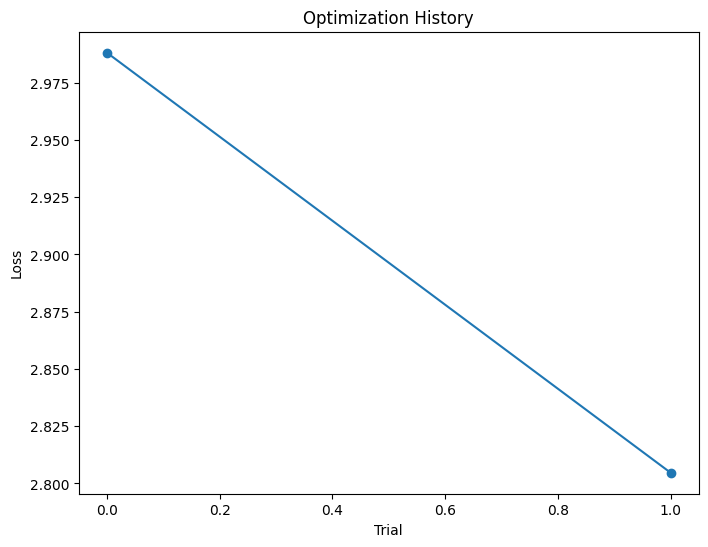

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning:

torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.



Step,Training Loss


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:90: UserWarning:

None of the inputs have requires_grad=True. Gradients will be None



Generated Lyrics:
Here comes the sun, it's always there, no matter how far you go.

That's what you have to see to believe.

So, here goes.

I can't say no, and I know my love is not here to please, but I am.

Just to be a loving family.
I am so happy and kind and we are.

We love to be your husband, and your children, and your children.

We don't know how to live the rest of our lives, but we do know that we have a goal, that's why we are there.

You're here, at the base of the mountain.

You're happy, you're happy, you're just happy.

And this is what you are.


You're a true love.

You're true love.


In [ ]:
# Dataset from hugging face
dataset = load_dataset("huggingartists/the-beatles", split='train[:80%]')
train_text = dataset['text']

# Preprocessing
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
train_encodings = tokenizer(train_text, truncation=True, padding=True)

# Building the Model
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Training the Model
class TextDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings['input_ids'])

train_dataset = TextDataset(train_encodings)

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    loss = torch.mean(torch.stack(logits))
    return {"loss": loss.item()}

def objective(trial):
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=trial.suggest_int("num_train_epochs", 1, 5),
        per_device_train_batch_size=trial.suggest_int("per_device_train_batch_size", 1, 4),
        save_steps=300,
        save_total_limit=2,
        logging_dir='./logs',
        learning_rate=trial.suggest_float("learning_rate", 1e-5, 1e-4, log=True),
        weight_decay=trial.suggest_float("weight_decay", 1e-3, 1e-1, log=True),
        warmup_steps=trial.suggest_int("warmup_steps", 100, 1000),
        gradient_accumulation_steps=trial.suggest_int("gradient_accumulation_steps", 32, 64),
        gradient_checkpointing=True,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=train_dataset,
        compute_metrics=compute_metrics,
        data_collator=data_collator,
    )

    train_result = trainer.train()
    loss = train_result.metrics["train_loss"]
    return loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=2)

best_trial = study.best_trial
print("Best trial:")
print("  Loss: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

# Plotting optimization history
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("Trial")
ax.set_ylabel("Loss")
ax.plot([t.value for t in study.trials], marker='o', linestyle='-')
ax.set_title("Optimization History")
plt.show()

# Plotting parameter importance
fig = optuna.visualization.plot_param_importances(study)
fig.show()

# Training with the best hyperparameters
best_params = study.best_params
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=best_params["num_train_epochs"],
    per_device_train_batch_size=best_params["per_device_train_batch_size"],
    save_steps=500,
    save_total_limit=2,
    logging_dir='./logs',
    learning_rate=best_params["learning_rate"],
    weight_decay=best_params["weight_decay"],
    warmup_steps=best_params["warmup_steps"],
    gradient_accumulation_steps=best_params["gradient_accumulation_steps"],
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=train_dataset,
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

train_result = trainer.train()

# Loss:
train_loss = train_result.metrics["train_loss"]

# Generating Lyrics inspired by The Beatles!!
def generate_lyrics(input_text, do_sample=True, temperature=0.8, max_length=300):
    input_ids = tokenizer.encode(input_text, return_tensors="pt")
    input_ids = input_ids.to(model.device)  # Move input_ids to the same device as the model

    generated_lyrics = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        do_sample=do_sample,
        temperature=temperature,
    )

    decoded_lyrics = tokenizer.decode(generated_lyrics[0], skip_special_tokens=True)
    return decoded_lyrics

# Input:
input_text = "Here comes the sun"
generated_lyrics = generate_lyrics(input_text)
print("Generated Lyrics:")
print(generated_lyrics)




# Loading the Dataset from hugging face
# dataset = load_dataset("huggingartists/the-beatles")
# train_text = dataset['train']['text']
# # Preprocessing the Data
# tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# tokenizer.pad_token = tokenizer.eos_token
# train_encodings = tokenizer(train_text, truncation=True, padding=True)
# # Building the Model
# model = GPT2LMHeadModel.from_pretrained("gpt2")
# # Training the Model
# class TextDataset(Dataset):
#  def __init__(self, encodings):
#  self.encodings = encodings
#  def __getitem__(self, idx):
#  return {key: val[idx] for key, val in self.encodings.items()}
#  def __len__(self):
#  return len(self.encodings['input_ids'])
# train_dataset = TextDataset(train_encodings)
# data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer,
# mlm=False)
# training_arg
# training_args = TrainingArguments(
#  output_dir='./results',
#  num_train_epochs=3,
#  per_device_train_batch_size=1,
#  save_steps=10_000,
#  save_total_limit=2,
#  logging_dir='./logs',
# )
# # Making a custom function to compute perplexity during training
# def compute_metrics(eval_pred):
#  predictions, labels = eval_pred
#  loss = np.mean(predictions.loss)
#  perplexity = np.exp(loss)
#  return {"perplexity": perplexity}
# trainer = Trainer(
#  model=model,
#  args=training_args,
#   data_collator=data_collator,
#  train_dataset=train_dataset,
#  eval_dataset=train_dataset, # Use the training dataset for
# evaluation
#  compute_metrics=compute_metrics
# )
# # Training the model
# train_result = trainer.train()
# # Step 5: Generating New Lyrics
# def generate_lyrics(input_text, do_sample=True, temperature=None):
#  input_ids = tokenizer.encode(input_text, return_tensors="pt")
#  input_ids = input_ids.to(model.device) # Move input_ids to the same
# device as the model
#  generated_lyrics = model.generate(
#  input_ids=input_ids,
#  max_length=100,
#  num_return_sequences=1,
#  do_sample=do_sample,
#  temperature=temperature,
#  )
#  decoded_lyrics = tokenizer.decode(generated_lyrics[0],
# skip_special_tokens=True)
#  return decoded_lyrics
# # Input:
# input_text = "Here comes the sun"
# generated_lyrics = generate_lyrics(input_text)
# print("Generated Lyrics:")
# print(generated_lyrics)
# # Plotting training loss and perplexity
# train_metrics = train_result.metrics
# train_loss = train_metrics["train_loss"]
# train_perplexity = train_metrics["perplexity"]
# epochs = range(1, len(train_loss) + 1)
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(epochs, train_loss, label="Training Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.title("Training Loss")
# plt.legend()
# plt.subplot(1, 2, 2)
# plt.plot(epochs, train_perplexity, label="Training Perplexity")
# plt.xlabel("Epoch")
# plt.ylabel("Perplexity")
# plt.title("Training Perplexity")
# plt.legend()
# plt.show()